In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tools
import importlib
from scipy.optimize import curve_fit
import sys
import math
importlib.reload(tools)

KeyboardInterrupt: 

In [35]:
file=open("./runns4nt32b2.6nr32_test_data/data_inst.txt","r")
data=[]
file.readline()
file.readline()
for line in file:
    line=line.replace("\n","")
    line=line.replace("\t \t"," \t")
    split=line.split("\t")
    data.append(split)
file.close()

data=np.array(data,dtype=float)
Q=[]
N=[]
for element in data:
    if not (element[1]+element[2])%2:
        Q.append(int(element[1]-element[2]))
        N.append(int(element[1]+element[2]))
    
N_hist=np.zeros(1+max(N),dtype=int)
for element in N:
    N_hist[int(element)]+=1
    
Q_hist=np.zeros(1+max(N),dtype=int)
for element in Q:
    Q_hist[int(element)]+=1
    
odd=np.arange(1,max(N)+1,2, dtype=int)
even=np.arange(0,max(N)+2,2, dtype=int)
N_hist=np.delete(N_hist,odd)

In [36]:
from distfit import distfit

In [37]:
from scipy.stats import binom
from scipy import stats
import scipy
import pandas as pd

In [39]:
def binomial(x,Nt,A):
    temp=math.factorial(Nt)/(math.factorial(int(x))*math.factorial(int(Nt-x)))
    result=(A**(x))*((1/(1+A))**Nt)*temp
    return(result)

def binomial_p(x,Nt,p):
    temp=math.factorial(Nt)/(math.factorial(int(x))*math.factorial(int(Nt-x)))
    print(temp)
    result=(p**x)*((1-p)**(Nt-x))
    print(result)
    return(result)

In [117]:
Nt=32*32
bounds = [(Nt, Nt), (0, 1)]
dist = stats.binom
res = stats.fit(dist, N, bounds)
res.params

FitParams(n=1024.0, p=0.0030966911547095737, loc=0.0)

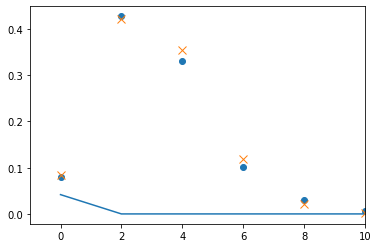

In [118]:
plt.plot(even,y)
plt.scatter(even,N_hist/len(data))
plt.xlim(-1,10)
plt.plot(even, 2*binom.pmf(even, res.params[0], res.params[1]), 'x', ms=8, label='binom pmf')